# Extrasolar systems - Matplotlib science communication Visualization 

# Import

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
import seaborn as sns; sns.set()

# PHL's Exoplanets Catalog

Dataset website:  https://phl.upr.edu/projects/the-habitable-exoplanets-catalog


In [70]:
path = ''
data_PHL =  pd.read_csv(path + 'phl_exoplanet_catalog_2019.csv')
    
print(data_PHL.shape)

(4048, 112)


In [71]:
set(data_PHL['P_TYPE'])

{'Jovian',
 'Miniterran',
 'Neptunian',
 'Subterran',
 'Superterran',
 'Terran',
 nan}

In [72]:
data_PHL.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_ERROR_MIN,P_SEMI_MAJOR_AXIS_ERROR_MAX,P_ECCENTRICITY,P_ECCENTRICITY_ERROR_MIN,P_ECCENTRICITY_ERROR_MAX,P_INCLINATION,P_INCLINATION_ERROR_MIN,P_INCLINATION_ERROR_MAX,P_OMEGA,P_OMEGA_ERROR_MIN,P_OMEGA_ERROR_MAX,P_TPERI,P_TPERI_ERROR_MIN,P_TPERI_ERROR_MAX,P_ANGULAR_DISTANCE,P_IMPACT_PARAMETER,P_IMPACT_PARAMETER_ERROR_MIN,P_IMPACT_PARAMETER_ERROR_MAX,P_TEMP_MEASURED,P_GEO_ALBEDO,P_GEO_ALBEDO_ERROR_MIN,P_GEO_ALBEDO_ERROR_MAX,P_DETECTION,P_DETECTION_MASS,P_DETECTION_RADIUS,P_ALT_NAMES,...,P_HILL_SPHERE,P_DISTANCE,P_PERIASTRON,P_APASTRON,P_DISTANCE_EFF,P_FLUX,P_FLUX_MIN,P_FLUX_MAX,P_TEMP_EQUIL,P_TEMP_EQUIL_MIN,P_TEMP_EQUIL_MAX,P_TYPE,S_RADIUS_EST,S_TYPE_TEMP,S_RA_H,S_RA_T,S_DEC_T,S_LUMINOSITY,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,S_HZ_CON0_MIN,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,326.03000,-0.32,0.32,1.29,-0.05,0.05,0.231,-0.005,0.005,NaN,NaN,NaN,94.8,-1.5,1.5,2452899.6,-1.6,1.6,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radial Velocity,NaN,NaN,NaN,...,0.130671,1.324418,0.99201,1.58799,1.298759,101.011410,64.855456,166.191940,799.44963,722.98875,914.73942,Jovian,19.00,K,12.345286,12 20 43.0286,+17 47 34.3248,163.546800,10.132812,24.763411,12.834754,23.477907,13.586847,23.477907,12.390643,23.477907,34.529063,0.476460,0.642400,0,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,516.21997,-3.20,3.20,1.53,-0.07,0.07,0.080,-0.030,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radial Velocity,NaN,NaN,NaN,...,0.167551,1.534896,1.40760,1.65240,1.531227,107.351180,91.741348,126.426170,819.07569,788.47184,854.28770,Jovian,29.79,K,15.284970,15 17 05.8915,+71 49 26.0328,250.492940,12.770059,31.984271,16.175280,30.323783,17.134143,30.323783,15.615215,30.323783,42.732816,0.193891,0.648683,0,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,185.84000,-0.23,0.23,0.83,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2452861.4,-1.5,1.5,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radial Velocity,NaN,NaN,NaN,...,0.073485,0.830000,0.83000,0.83000,0.830000,84.446427,84.446427,84.446427,772.30746,772.30746,772.30746,Jovian,11.00,G,23.521506,23 31 17.4215,+39 14 10.3128,58.175144,6.025230,14.680087,7.631867,13.918028,8.078404,13.918028,7.367780,13.918028,20.593611,0.502752,0.600010,0,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,1773.40000,-2.50,2.50,2.93,-0.08,0.08,0.370,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radial Velocity,NaN,NaN,NaN,...,0.217991,3.130558,1.84590,4.01410,2.982550,0.078887,0.039047,0.184651,131.38424,113.25125,167.00637,Jovian,0.93,K,16.173421,16 10 24.3158,+43 49 03.5256,0.629171,0.610595,1.457913,0.773404,1.382234,0.818179,1.382234,0.746615,1.382234,2.141648,0.919756,0.445415,0,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,798.50000,-1.00,1.00,1.66,-0.03,0.03,0.680,-0.020,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radial Velocity,NaN,NaN,NaN,...,0.042832,2.043792,0.53120,2.78880,1.774870,0.618972,0.160799,4.432011,202.22783,161.33012,369.65374,Jovian,1.13,G,19.697771,19 41 51.9764,+50 31 03.0900,1.250596,0.840657,1.982050,1.064798,1.879164,1.125991,1.879164,1.027861,1.879164,3.019411,1.983658,0.473325,1,1,

In [73]:
# check NaN values per columns
print("Number of NaN navlues per feature (column): \n")
print(data_PHL.isnull().sum(axis = 0))

Number of NaN navlues per feature (column): 

P_NAME                      0
P_STATUS                    0
P_MASS                   2450
P_MASS_ERROR_MIN         2581
P_MASS_ERROR_MAX         2581
                         ... 
S_CONSTELLATION_ABR         0
S_CONSTELLATION_ENG         0
P_RADIUS_EST                0
P_MASS_EST                  0
P_SEMI_MAJOR_AXIS_EST      70
Length: 112, dtype: int64


In [74]:
nulls = data_PHL.isnull().sum(axis = 0)
cols = data_PHL.columns
for i, n in enumerate(nulls):
    if (n >= 0):
        print(cols[i], n)

P_NAME 0
P_STATUS 0
P_MASS 2450
P_MASS_ERROR_MIN 2581
P_MASS_ERROR_MAX 2581
P_RADIUS 909
P_RADIUS_ERROR_MIN 943
P_RADIUS_ERROR_MAX 943
P_YEAR 0
P_UPDATED 0
P_PERIOD 110
P_PERIOD_ERROR_MIN 241
P_PERIOD_ERROR_MAX 241
P_SEMI_MAJOR_AXIS 1681
P_SEMI_MAJOR_AXIS_ERROR_MIN 2485
P_SEMI_MAJOR_AXIS_ERROR_MAX 2484
P_ECCENTRICITY 2668
P_ECCENTRICITY_ERROR_MIN 3077
P_ECCENTRICITY_ERROR_MAX 3077
P_INCLINATION 3204
P_INCLINATION_ERROR_MIN 3236
P_INCLINATION_ERROR_MAX 3238
P_OMEGA 3302
P_OMEGA_ERROR_MIN 3355
P_OMEGA_ERROR_MAX 3355
P_TPERI 3567
P_TPERI_ERROR_MIN 3576
P_TPERI_ERROR_MAX 3576
P_ANGULAR_DISTANCE 1687
P_IMPACT_PARAMETER 2639
P_IMPACT_PARAMETER_ERROR_MIN 2641
P_IMPACT_PARAMETER_ERROR_MAX 2641
P_TEMP_MEASURED 4043
P_GEO_ALBEDO 4048
P_GEO_ALBEDO_ERROR_MIN 4043
P_GEO_ALBEDO_ERROR_MAX 4043
P_DETECTION 0
P_DETECTION_MASS 4048
P_DETECTION_RADIUS 4048
P_ALT_NAMES 4048
P_ATMOSPHERE 4048
S_NAME 0
S_RA 0
S_DEC 0
S_MAG 179
S_DISTANCE 6
S_DISTANCE_ERROR_MIN 81
S_DISTANCE_ERROR_MAX 81
S_METALLICITY 1206
S

In [75]:
# check detections techniques 
np.unique(data_PHL['P_DETECTION'])

array(['Astrometry', 'Eclipse Timing Variations', 'Imaging',
       'Microlensing', 'Orbital Brightness Modulation', 'Pulsar Timing',
       'Pulsation Timing Variations', 'Radial Velocity', 'Transit',
       'Transit Timing Variations'], dtype=object)

In [76]:
# Get one example
#TOI-1298 b

data_PHL[data_PHL["P_NAME"] == "HIP 65426 b"]

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_ERROR_MIN,P_SEMI_MAJOR_AXIS_ERROR_MAX,P_ECCENTRICITY,P_ECCENTRICITY_ERROR_MIN,P_ECCENTRICITY_ERROR_MAX,P_INCLINATION,P_INCLINATION_ERROR_MIN,P_INCLINATION_ERROR_MAX,P_OMEGA,P_OMEGA_ERROR_MIN,P_OMEGA_ERROR_MAX,P_TPERI,P_TPERI_ERROR_MIN,P_TPERI_ERROR_MAX,P_ANGULAR_DISTANCE,P_IMPACT_PARAMETER,P_IMPACT_PARAMETER_ERROR_MIN,P_IMPACT_PARAMETER_ERROR_MAX,P_TEMP_MEASURED,P_GEO_ALBEDO,P_GEO_ALBEDO_ERROR_MIN,P_GEO_ALBEDO_ERROR_MAX,P_DETECTION,P_DETECTION_MASS,P_DETECTION_RADIUS,P_ALT_NAMES,...,P_HILL_SPHERE,P_DISTANCE,P_PERIASTRON,P_APASTRON,P_DISTANCE_EFF,P_FLUX,P_FLUX_MIN,P_FLUX_MAX,P_TEMP_EQUIL,P_TEMP_EQUIL_MIN,P_TEMP_EQUIL_MAX,P_TYPE,S_RADIUS_EST,S_TYPE_TEMP,S_RA_H,S_RA_T,S_DEC_T,S_LUMINOSITY,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,S_HZ_CON0_MIN,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
903,HIP 65426 b,3.0,2860.452,-953.48401,953.48401,16.815,-1.121,1.121,2017,2017-07-13,NaN,NaN,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,826.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Imaging,NaN,NaN,NaN,...,10.438367,92.0,92.0,92.0,92.000002,0.002025,0.002025,0.002025,54.045813,54.045813,54.045813,Jovian,1.77,A,13.410028,13 24 36.1000,-51 30 16.0524,17.141319,2.870955,6.616267,3.636292,6.272837,3.841134,6.272837,3.509464,6.272837,11.178561,488.93242,0.219785,0,0,Cold,0,0.0566,Centaurus,Cen,Centaur,16.815,2860.452,92.0


## Prepare data

In [77]:
data_imaging = data_PHL

data_imaging.shape

(4048, 112)

In [78]:
nulls = data_imaging.isnull().sum(axis = 0)
cols = data_imaging.columns
for i, n in enumerate(nulls):
    if (n >= 0):
        print(cols[i], n)

P_NAME 0
P_STATUS 0
P_MASS 2450
P_MASS_ERROR_MIN 2581
P_MASS_ERROR_MAX 2581
P_RADIUS 909
P_RADIUS_ERROR_MIN 943
P_RADIUS_ERROR_MAX 943
P_YEAR 0
P_UPDATED 0
P_PERIOD 110
P_PERIOD_ERROR_MIN 241
P_PERIOD_ERROR_MAX 241
P_SEMI_MAJOR_AXIS 1681
P_SEMI_MAJOR_AXIS_ERROR_MIN 2485
P_SEMI_MAJOR_AXIS_ERROR_MAX 2484
P_ECCENTRICITY 2668
P_ECCENTRICITY_ERROR_MIN 3077
P_ECCENTRICITY_ERROR_MAX 3077
P_INCLINATION 3204
P_INCLINATION_ERROR_MIN 3236
P_INCLINATION_ERROR_MAX 3238
P_OMEGA 3302
P_OMEGA_ERROR_MIN 3355
P_OMEGA_ERROR_MAX 3355
P_TPERI 3567
P_TPERI_ERROR_MIN 3576
P_TPERI_ERROR_MAX 3576
P_ANGULAR_DISTANCE 1687
P_IMPACT_PARAMETER 2639
P_IMPACT_PARAMETER_ERROR_MIN 2641
P_IMPACT_PARAMETER_ERROR_MAX 2641
P_TEMP_MEASURED 4043
P_GEO_ALBEDO 4048
P_GEO_ALBEDO_ERROR_MIN 4043
P_GEO_ALBEDO_ERROR_MAX 4043
P_DETECTION 0
P_DETECTION_MASS 4048
P_DETECTION_RADIUS 4048
P_ALT_NAMES 4048
P_ATMOSPHERE 4048
S_NAME 0
S_RA 0
S_DEC 0
S_MAG 179
S_DISTANCE 6
S_DISTANCE_ERROR_MIN 81
S_DISTANCE_ERROR_MAX 81
S_METALLICITY 1206
S

In [79]:
# S_NAME - star name
# P_MASS 
# P_RADIUS
# P_DISTANCE 

#data_imaging_  = data_imaging[data_imaging['P_RADIUS'].isnull() == False]
data_imaging_  = data_imaging_[data_imaging_['P_DISTANCE'].isnull() == False]

data_imaging_.shape

(3075, 112)

In [80]:
# count solar systems
solar_system  = [x for _, x in data_imaging_.groupby(data_imaging_['S_NAME'])]
print(len(solar_system))

2337


In [81]:
# count exoplanets per solar system. For example, 344 systems have 2 exoplanets. 
cont = {}
for system in solar_system:
    if (system.shape[0] not in cont):
        cont[system.shape[0]] = 1
    else:
        cont[system.shape[0]] += 1
cont

{1: 1834, 2: 344, 3: 106, 4: 37, 5: 12, 6: 2, 7: 1, 8: 1}

In [82]:
# filter less than 5 exoplanets per system
valid_solar_systems = []

for system in solar_system:
    if (system.shape[0] >= 5):
        valid_solar_systems.append( system )

print(len(valid_solar_systems))     

16


In [83]:
for i, system in enumerate(valid_solar_systems):
    print(f"Sistema {i+1} P_RADIUS  {np.min(system['P_RADIUS'])},  {np.max(system['P_RADIUS'])} " )

for i, system in enumerate(valid_solar_systems):  
    print(f"Sistema {i+1} P_DISTANCE  {np.min(system['P_DISTANCE'])},  {np.max(system['P_DISTANCE'])} " )


Sistema 1 P_RADIUS  1.5694,  3.2957400000000003 
Sistema 2 P_RADIUS  0.47082,  2.21958 
Sistema 3 P_RADIUS  1.8048099999999998,  4.19254 
Sistema 4 P_RADIUS  1.25552,  3.6880900000000003 
Sistema 5 P_RADIUS  1.13221,  2.5783 
Sistema 6 P_RADIUS  1.06495,  1.40125 
Sistema 7 P_RADIUS  0.86317,  3.0491200000000003 
Sistema 8 P_RADIUS  1.3227799999999998,  2.66798 
Sistema 9 P_RADIUS  1.5245600000000001,  2.08506 
Sistema 10 P_RADIUS  0.81833,  2.70161 
Sistema 11 P_RADIUS  1.73755,  5.347169999999999 
Sistema 12 P_RADIUS  0.40356,  0.73986 
Sistema 13 P_RADIUS  0.53808,  1.9505400000000002 
Sistema 14 P_RADIUS  1.13221,  2.73524 
Sistema 15 P_RADIUS  1.18826,  11.29968 
Sistema 16 P_RADIUS  0.75107,  1.13221 
Sistema 1 P_DISTANCE  0.036544712,  0.11120967 
Sistema 2 P_DISTANCE  0.055353095,  0.16598574 
Sistema 3 P_DISTANCE  0.091092138,  0.4712425 
Sistema 4 P_DISTANCE  0.044,  1.24 
Sistema 5 P_DISTANCE  0.04,  0.359 
Sistema 6 P_DISTANCE  0.0343,  0.4323456 
Sistema 7 P_DISTANCE  0.04

In [84]:
col_interes = ['P_NAME', 'P_RADIUS', 'S_NAME', 'P_DISTANCE']

print(valid_solar_systems[2][col_interes].shape)
valid_solar_systems[0][col_interes]

(6, 4)


,P_NAME,P_RADIUS,S_NAME,P_DISTANCE
970,K2-138 b,1.56940,K2-138,0.036545
971,K2-138 c,2.52225,K2-138,0.046491
972,K2-138 d,2.65677,K2-138,0.062392
973,K2-138 e,3.29574,K2-138,0.081943
974,K2-138 f,2.81371,K2-138,0.111210


## Generate visualization with Matplotlib

['', '0.17', '0.33', '0.5', '0.67', '0.83', '1.0', '1.17[UA]', '1.33[UA]', '1.5[UA]', '1.67[UA]']
0
1
2


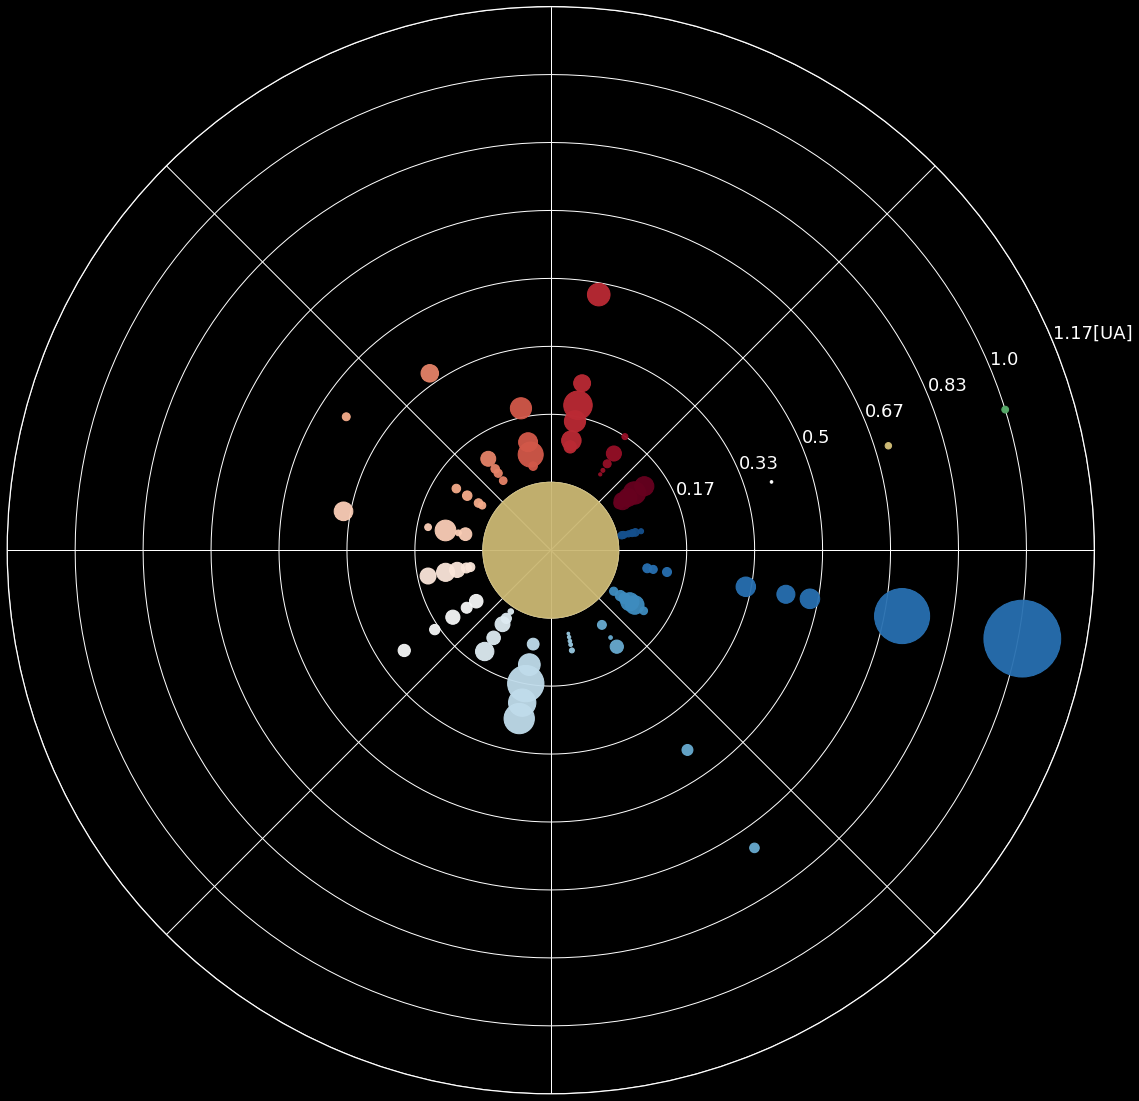

In [85]:
fig = plt.figure(figsize=(20, 20))

plt.style.use('dark_background')

ax = plt.subplot(111, polar=True)

scale = 3
ax.set_rmax(4)


cmap = plt.cm.get_cmap('RdBu')

scale_radius = 40

base_dist = 0.5


circle = plt.Circle(( 0, 0), base_dist, transform=ax.transData._b, color = "y", alpha=0.95) # sun 
 
ax.add_artist(circle)


new_ytick = ['']
for i in range(10):
    if (i < 6):
        new_ytick.append(str(round( (i+1)*0.5/scale, 2 )))
    else:
        new_ytick.append(str(round( (i+1)*0.5/scale, 2 ))  + '[UA]' )
print(new_ytick)
ax.set_yticklabels(new_ytick, fontsize = 18)
ax.set_xticklabels([])


for s in range(len(valid_solar_systems)):
    
    angle = s*(2*np.pi/len(valid_solar_systems)) + 0.6
    
    for index, row in valid_solar_systems[s][col_interes].iterrows():

        circle = plt.Circle(( (base_dist + scale*row["P_DISTANCE"] ) *np.cos(angle) , (base_dist + scale*row["P_DISTANCE"])*np.sin(angle)), 
                           row["P_RADIUS"]/scale_radius, transform=ax.transData._b, color = cmap(s/len(valid_solar_systems)), alpha=0.95)
        
        ax.add_artist(circle)

        last = row["P_DISTANCE"]
    
# solar system distances
distancias_sistema_solar = [0.4, 0.7, 1 ] # mercury, venus, earth
radios_sistema_solar = [0.383, 0.949, 1]
colores_sistema_solar = ["w", "y", "g"]


for j in range(len(distancias_sistema_solar)):
    print(j)
    s = 0

    angle = 0.3
    circle = plt.Circle( ( (base_dist + scale*distancias_sistema_solar[j])*np.cos(angle) , (base_dist + scale*distancias_sistema_solar[j])*np.sin(angle) ), 
                            radios_sistema_solar[j]/scale_radius, transform=ax.transData._b, color = colores_sistema_solar[j], alpha=1)

    ax.add_artist(circle)
